In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import sklearn
import keras
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn import preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [92]:
df = pd.read_csv(r"C:\Users\Srushti\Downloads\Financial Sentiment analysis.csv")

In [93]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [94]:
df.shape

(5842, 2)

In [95]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [16]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [17]:
df.duplicated().sum()

6

In [18]:
df.drop_duplicates(keep='first', inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5836 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5836 non-null   object
 1   Sentiment  5836 non-null   object
dtypes: object(2)
memory usage: 136.8+ KB


In [20]:
df["Sentiment"].value_counts()

Sentiment
neutral     3124
positive    1852
negative     860
Name: count, dtype: int64

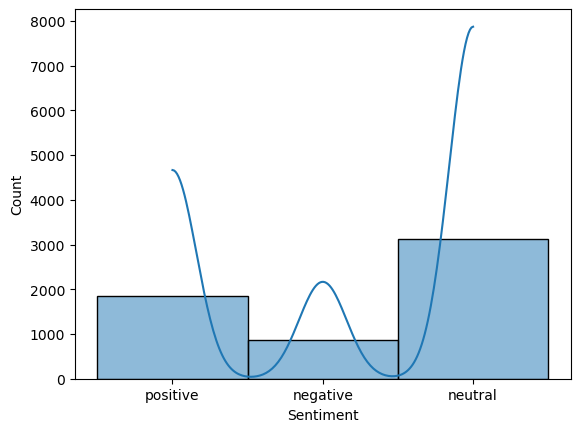

In [29]:
sns.histplot(x=df['Sentiment'], kde=True)
plt.show()

In [124]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df["Cleaned_Sentence"] = df["Sentence"].apply(clean)
df

,Sentence,Sentiment,Cleaned_Sentence,Cleaned_sentiment
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,negative
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,positive
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,neutral
...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rising costs have forced packaging producer hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral,according shipping company viking line the eu...,neutral
5840,"In the building and home improvement trade , s...",neutral,in the building and home improvement trade sa...,neutral


In [125]:
vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(1,2))
X = pd.DataFrame(vectorizer.fit_transform(df["Cleaned_Sentence"]).toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,803,804,805,806,807,808,809,810,811,812
0,58,4,3,3,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64,3,0,1,1,1,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,36,3,0,4,0,0,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,40,2,1,1,0,1,2,0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,30,2,0,1,0,0,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
5838,26,2,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5839,28,2,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5840,26,1,2,0,1,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [126]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X))
x

,0,1,2,3,4,5,6,7,8,9,...,803,804,805,806,807,808,809,810,811,812
0,1.384342,1.365851,2.367331,1.785138,-0.664762,-0.766432,-0.881931,3.126536,-0.625802,-1.042374,...,-0.018506,-0.013084,-0.013084,-0.013084,-0.013084,-0.022667,-0.018506,-0.013084,-0.013084,-0.013084
1,-1.008854,-0.488363,0.258786,-0.924574,0.746408,0.274604,-0.881931,-0.484976,-0.625802,-1.042374,...,-0.018506,-0.013084,-0.013084,-0.013084,-0.013084,-0.022667,-0.018506,-0.013084,-0.013084,-0.013084
2,1.743321,0.747779,-0.795487,-0.021336,0.746408,0.274604,2.738760,-0.484976,-0.625802,-0.248637,...,-0.018506,-0.013084,-0.013084,-0.013084,-0.013084,-0.022667,-0.018506,-0.013084,-0.013084,-0.013084
3,0.068084,0.747779,-0.795487,2.688375,-0.664762,-0.766432,0.928414,-0.484976,-0.625802,-0.248637,...,-0.018506,-0.013084,-0.013084,-0.013084,-0.013084,-0.022667,-0.018506,-0.013084,-0.013084,-0.013084
4,0.307404,0.129708,0.258786,-0.021336,-0.664762,0.274604,0.928414,-0.484976,0.794530,0.545099,...,-0.018506,-0.013084,-0.013084,-0.013084,-0.013084,-0.022667,-0.018506,-0.013084,-0.013084,-0.013084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,-0.290895,0.129708,-0.795487,-0.021336,-0.664762,-0.766432,0.023241,-0.484976,3.635194,-0.248637,...,-0.018506,-0.013084,-0.013084,-0.013084,-0.013084,-0.022667,-0.018506,-0.013084,-0.013084,-0.013084
5838,-0.530214,0.129708,0.258786,-0.021336,-0.664762,-0.766432,0.023241,-0.484976,-0.625802,-1.042374,...,-0.018506,-0.013084,-0.013084,-0.013084,-0.013084,-0.022667,-0.018506,-0.013084,-0.013084,-0.013084
5839,-0.410555,0.129708,-0.795487,-0.021336,0.746408,0.274604,0.023241,-0.484976,0.794530,-0.248637,...,-0.018506,-0.013084,-0.013084,-0.013084,-0.013084,-0.022667,-0.018506,-0.013084,-0.013084,-0.013084
5840,-0.530214,-0.488363,1.313058,-0.924574,0.746408,0.274604,-0.881931,-0.484976,0.794530,0.545099,...,-0.018506,-0.013084,-0.013084,-0.013084,-0.013084,-0.022667,-0.018506,-0.013084,-0.013084,-0.013084


In [127]:
encoder = preprocessing.OneHotEncoder()
y = pd.DataFrame(encoder.fit_transform(df[['Sentiment']]).toarray())
y

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
5837,1.0,0.0,0.0
5838,0.0,1.0,0.0
5839,0.0,1.0,0.0
5840,0.0,1.0,0.0


In [128]:
!pip install wordcloud

In [129]:
from wordcloud import WordCloud
all_words = ' '.join(word for word in df['Sentence'])

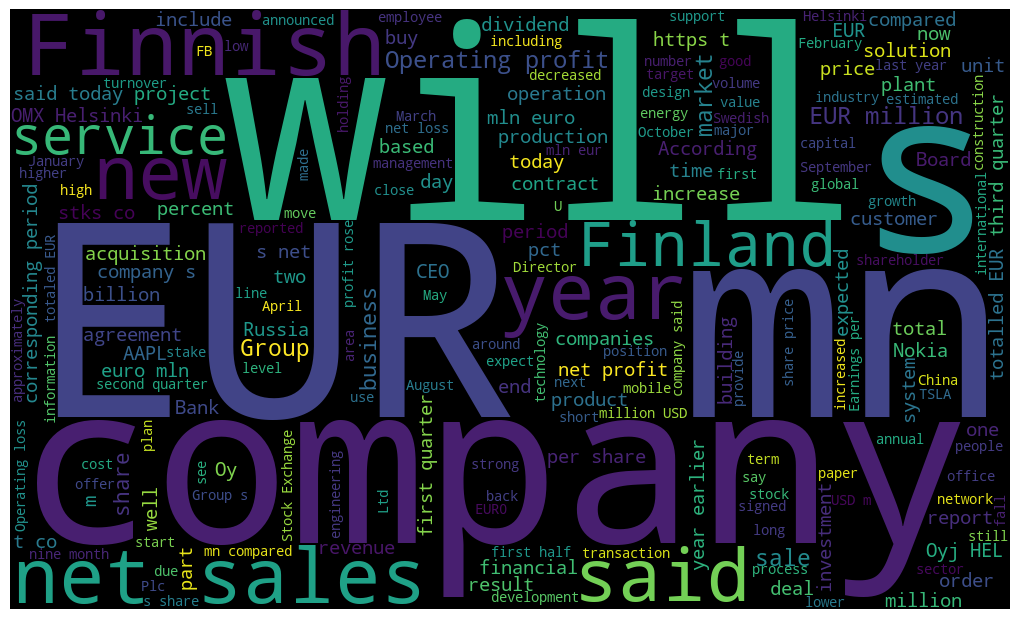

In [130]:
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'black',
    min_font_size = 10).generate(all_words)
plt.figure(figsize = (10, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [131]:
X_train, X_temp, Y_train, Y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [132]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               104192    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 3)                

In [133]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [134]:
history= model.fit(x=X_train, y=Y_train, epochs=50, batch_size=10, validation_data=(X_val, Y_val))

Epoch 1/50
351/351 [==============================] - 4s 11ms/step - loss: 1.2334 - accuracy: 0.4608 - val_loss: 0.9865 - val_accuracy: 0.5385
Epoch 2/50
351/351 [==============================] - 3s 9ms/step - loss: 1.0268 - accuracy: 0.5335 - val_loss: 0.9704 - val_accuracy: 0.5334
Epoch 3/50
351/351 [==============================] - 3s 9ms/step - loss: 0.9592 - accuracy: 0.5555 - val_loss: 0.9237 - val_accuracy: 0.5462
Epoch 4/50
351/351 [==============================] - 3s 9ms/step - loss: 0.9202 - accuracy: 0.5812 - val_loss: 0.8824 - val_accuracy: 0.6045
Epoch 5/50
351/351 [==============================] - 3s 9ms/step - loss: 0.8759 - accuracy: 0.6066 - val_loss: 0.8531 - val_accuracy: 0.6224
Epoch 6/50
351/351 [==============================] - 3s 9ms/step - loss: 0.8197 - accuracy: 0.6334 - val_loss: 0.8429 - val_accuracy: 0.6430
Epoch 7/50
351/351 [==============================] - 3s 9ms/step - loss: 0.8283 - accuracy: 0.6445 - val_loss: 0.8348 - val_accuracy: 0.6430
Epoch

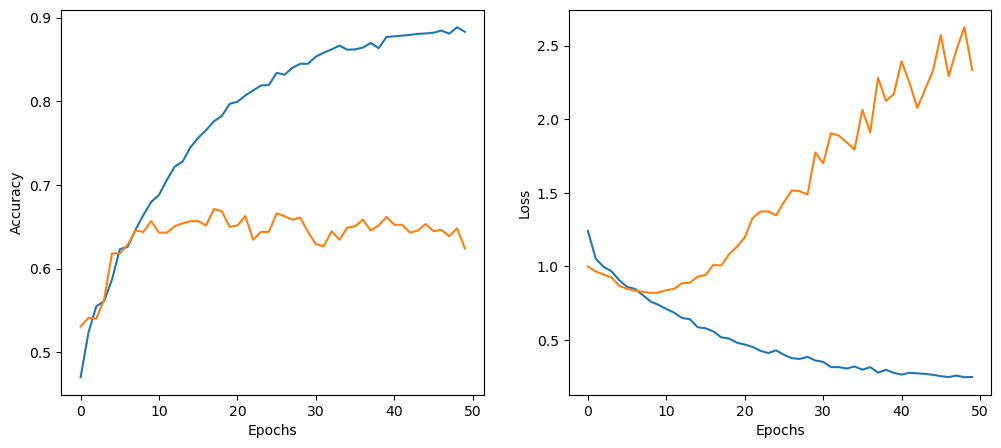

In [109]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

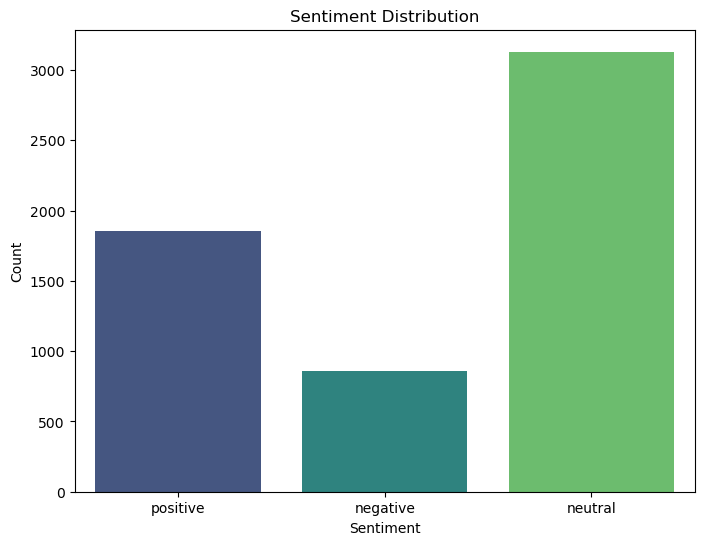

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [113]:
pivot_table = df.pivot_table(index='Cleaned_Sentence', columns='Sentiment', aggfunc=len, fill_value=0)

Text(0.5, 1.0, 'Sentiment Analysis Heatmap')

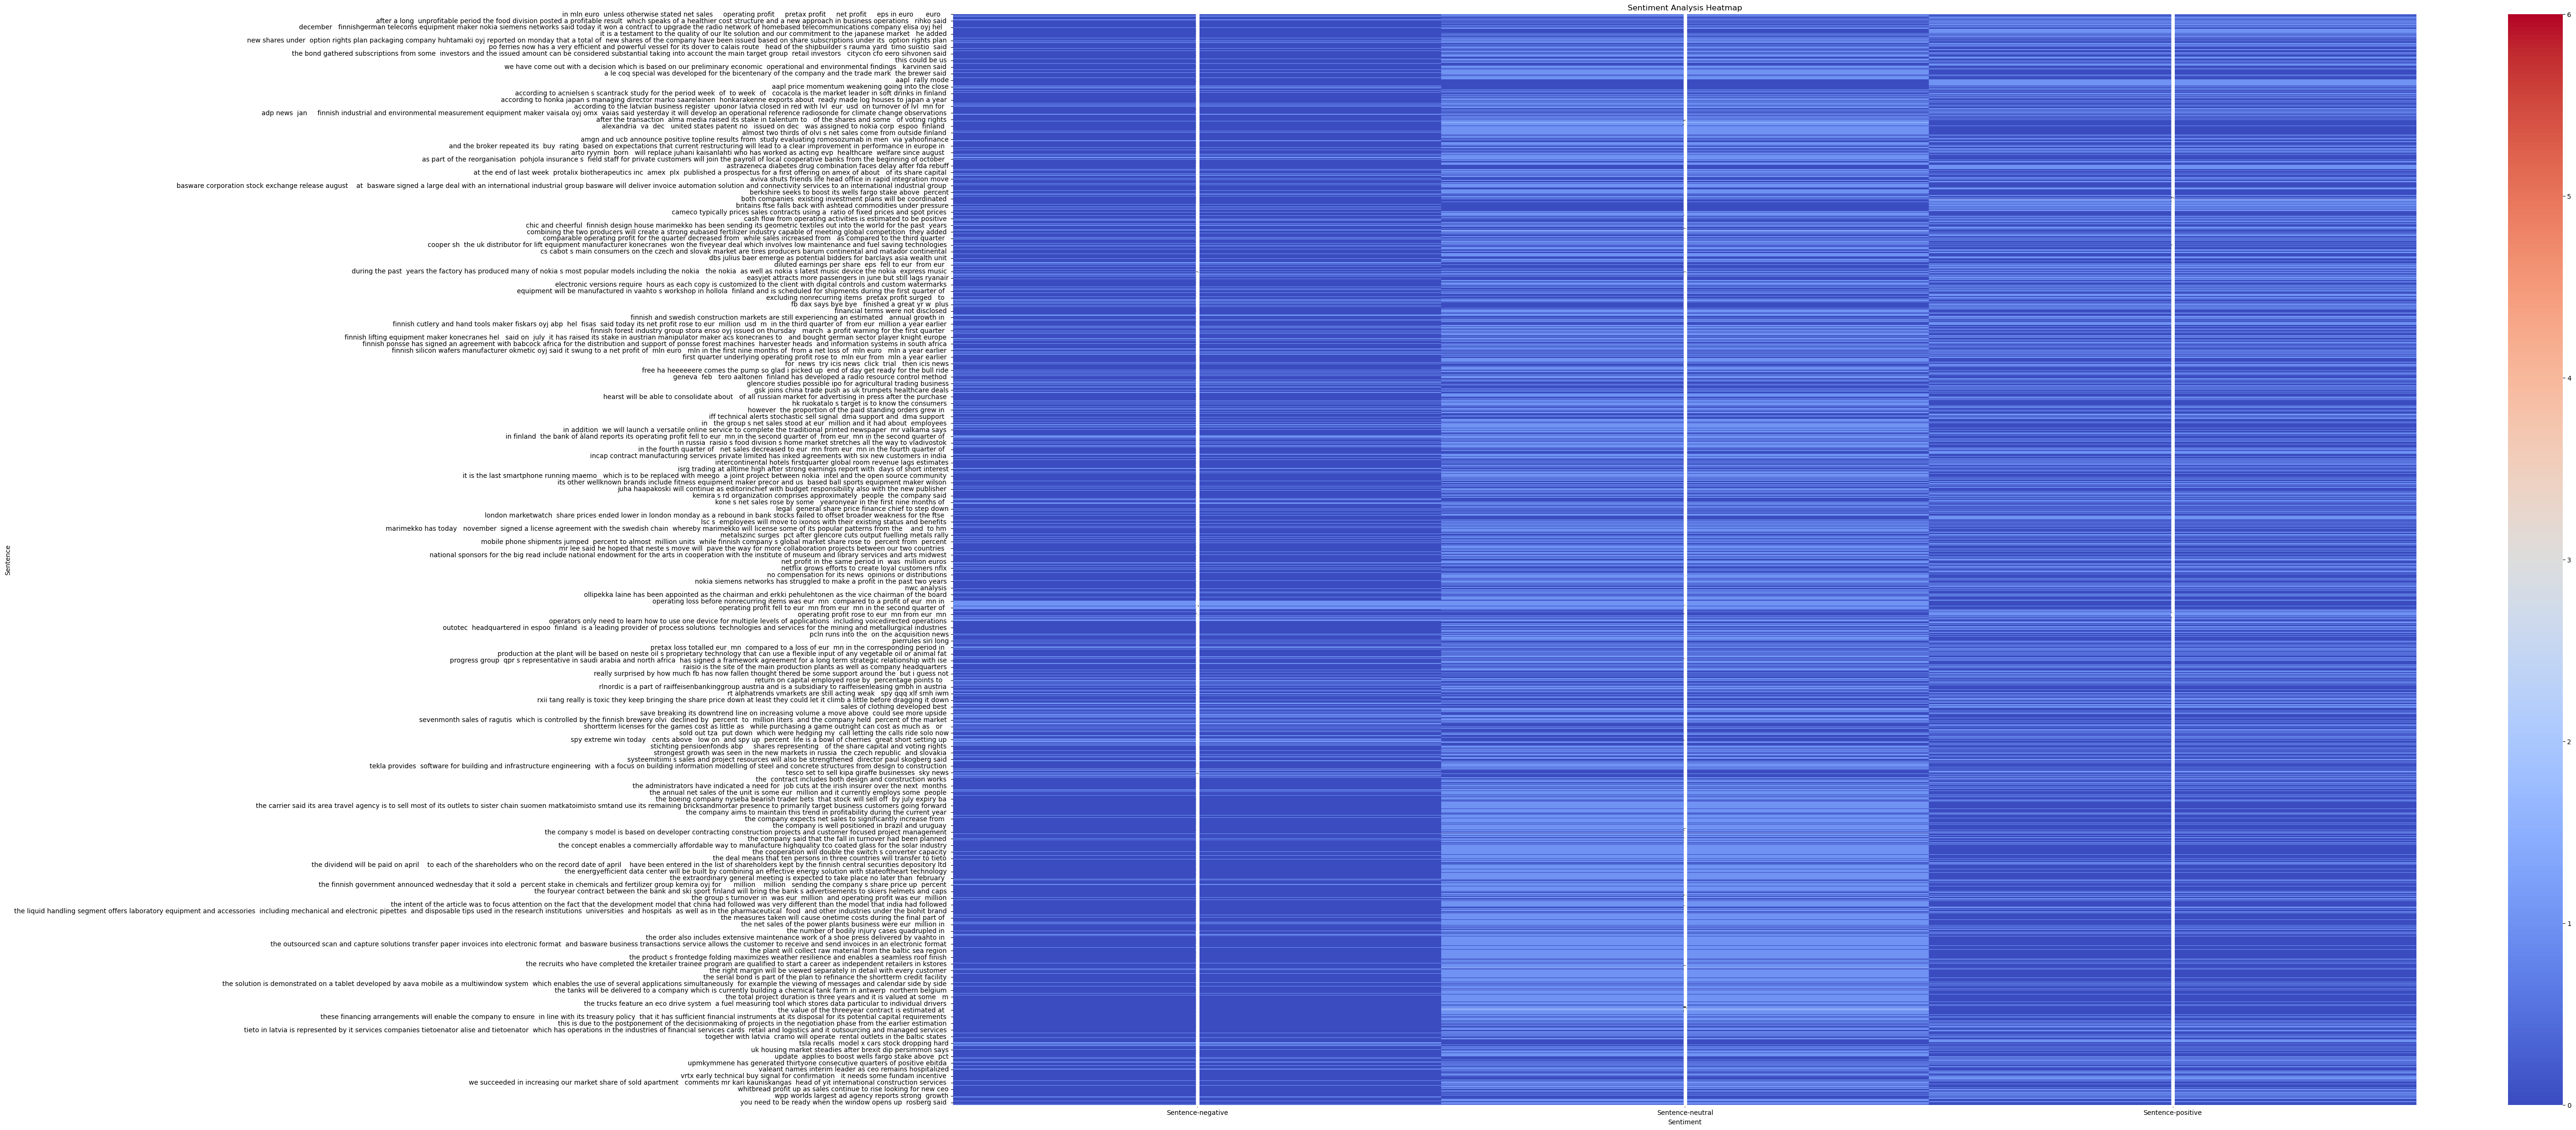

In [114]:
plt.figure(figsize=(50, 30))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g')

plt.xlabel('Sentiment')
plt.ylabel('Sentence')
plt.title('Sentiment Analysis Heatmap')

In [135]:
loss, acc = model.evaluate(X_test, Y_test)
print("Accuracy:", acc)
print("Loss:", loss)


37/37 [==============================] - 0s 4ms/step - loss: 2.4470 - accuracy: 0.6484
Accuracy: 0.6484174728393555
Loss: 2.4470458030700684


In [136]:
df.head()

,Sentence,Sentiment,Cleaned_Sentence,Cleaned_sentiment
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down to bk a real possibility,negative
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of componenta s net sal...,positive
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,neutral
